# EM Algorithm

est un algorithme itératif qui permet de trouver les paramètres du maximum de vraisemblance d'un modèle probabiliste lorsque ce dernier dépend de variables latentes non observables.on cherche à déterminer le paramètre θ maximisant la log-vraisemblance donnée par $\mathcal{L}$
\begin{align*}
    \mathcal{L}(\theta, q) &\leq P(X | \theta) 
\end{align*}

\begin{align*}
    \mathcal{L}(\theta, q) &= \int q(T) \log \frac{P(X, T|\theta)}{q(T)} dT
\end{align*}

ou $q$ est la distribution variationnelle, $\theta$ sont les paramètres du modèle, $X$ sont les données observées et $T$ sont la collection de variables latentes.

## E-step
Au cours de l'étape E, nous recherchons une distribution variationnelle $q$  qui maximise that maximizes $\mathcal{L}(q, \theta)$:

\begin{align*}
    q^{(t+1)} &= \arg \max_q \mathcal{L}(q, \theta^{(t)}) \\
    &= \arg \min_q \mathbb{KL}[q(T) \ || \ P(T|X, \theta^{(t)})] &&\text{See EM notes for derivation}\\
    &= P(T|X, \theta^{(t)})
\end{align*}

Ainsi, lors de l'étape E, nous réglons simplement $q(T)$ au modèle a posteriori(proba a posteriorie) sur les classes latentes, $P(T|X, \theta^{(t)})$.Bien que cela ne soit pas toujours possible (puisque nous ne pourrons peut-être pas calculer $P(T|X, \theta)$ analytiquement), dans le GMM c'est direct.

## Etape-M
Au cours de l'étape M, nous recherchons un réglage des paramètres du modèle $\theta$ qui maximise $\mathcal{L}(q^{(t+1)}, \theta)$:

\begin{align*}
    \theta^{(t+1)} &= \arg \max_\theta \mathcal{L}(q^{(t+1)},\theta)\\
    &= \arg \max_\theta \mathbb{E}_{\sim q}\log p(X,T | \theta)
\end{align*}

---

## GMM
Pour le GMM, $\theta$ est un ensemble de paramètres constitué des vecteurs moyens $\mu_c$, matrices de covariance $\Sigma_c$ and priors $\pi_c$ pour chaque composant.

Les variables latentes $T$ sont des indices de composants auxquels chaque point de données est affecté. $T_i$ (index de cluster pour le point de données $i$) est un vecteur chaud avec le bit actif dans la position correspondant à la vraie composante. Par exemple, si nous avons $C=3$ composants et point de données $i$ réside dans le premier composant, $T_i = [1, 0, 0]$.

La distribution conjointe pour le GMM peut s'écrire comme suit :

$$p(T, X \mid \theta) =  \prod\limits_{i=1}^N p(T_i, X_i \mid \theta) = \prod\limits_{i=1}^N \prod\limits_{c=1}^C [\pi_c \mathcal{N}(X_i \mid \mu_c, \Sigma_c)]^{T_{ic}}$$.

---
### Etape-E pour GMM
commencons par calculer $p(T_{ic}|X, \theta)$.

\begin{align*}
    p(T_{ic}|X, \theta) &= p(T_{ic}|X_i, \theta)\\
    &= \frac{p(X_i|T_{ic}, \theta)P(T_{ic}|\theta)}{\sum_c p(X_i | T_i=c, \theta)p(T_i=c | \theta)}\\
    &= \frac{\mathcal{N}(X_i | \mu_c, \Sigma_c) \pi_c }{\sum_c \mathcal{N}(X_i | \mu_c, \Sigma_c) \pi_c} &&\text{By the defintion of the GMM}
\end{align*}

dans l'espace de logarithme:

\begin{align*}
    \log p(T_{ic}|X, \theta) &= 
    \log \mathcal{N}(X_i | \mu_c, \Sigma_c) \pi_c - \log \sum_c \mathcal{N}(X_i | \mu_c, \Sigma_c) \pi_c \\
    &= \log \mathcal{N}(X_i | \mu_c, \Sigma_c) + \log \pi_c - \log \sum_c \mathcal{N}(X_i | \mu_c, \Sigma_c) \pi_c\\
    &= \log \mathcal{N}(X_i | \mu_c, \Sigma_c) + \log \pi_c - \log \sum_c \exp \left\{ \log \mathcal{N}(X_i | \mu_c, \Sigma_c) + \log \pi_c \right\}
\end{align*}

Finallement, calculons la forme de la log Gaussienne :

\begin{align*}
    \log \mathcal{N}(X_i | \mu_c, \Sigma_c) &= \log \left( \frac{1}{\sqrt{(2 \pi)^n |\Sigma|}} \right)
    + \log \left( \exp{-\frac{1}{2}(X_i - \mu_c)^\top \Sigma^{-1}(X_i-\mu_c)} \right)\\
    &= -\log \sqrt{(2 \pi)^n |\Sigma|} - \frac{1}{2}(X_i - \mu_c)^\top \Sigma^{-1}(X_i-\mu_c)\\
    &= -\log (2\pi)^{n/2}|\Sigma|^{1/2} - \frac{1}{2}(X_i - \mu_c)^\top \Sigma^{-1}(X_i-\mu_c)\\
    &= -\frac{1}{2} n \log (2\pi) - \frac{1}{2} \log |\Sigma| - \frac{1}{2}(X_i - \mu_c)^\top \Sigma^{-1}(X_i-\mu_c)\\
    &= -\frac{1}{2} \left(n \log (2\pi) + \log |\Sigma| + (X_i - \mu_c)^\top \Sigma^{-1}(X_i-\mu_c) \right)
\end{align*}

# Etape-M pour GMM

On veut maximiser $\mathbb{E}_{\sim q}\log p(X,T | \theta)$ en fonction de $\theta$. dans notre modele cela signifie que nous voulons chercher les valeur optimal de $\pi$, $\mu$, $\Sigma$. pour ce faire, On doit calc les dérivés partiel wrt pour chaq paramètre et les metre a zero.

<br>


### Variational lower bound for the GMM marginal likelihood

As a coordinate ascent technique, the EM algorithm is guaranteed never to decrease $\mathcal{L}$ as it proceeds.

\begin{align}
    \mathcal{L}(\theta, q) &= \sum_T q(T) \log \left[ \frac{P(X, T|\theta)}{q(T)} \right] &&\text{General form}\\
     &= \sum_{i=1}^{N} \sum_{c=1}^{C} q(T_{ic}) \log \left[ \frac{p(X_i, T_{ic} | \theta)}{q(T_{ic})} \right] \\
&= \sum_{i=1}^{N} \sum_{c=1}^{C} q(T_{ic}) \log p(X_i, T_{ic} | \theta) - \sum_{i=1}^{N} \sum_{c=1}^{C} q(T_{ic}) \log q(T_{ic}) \\
    &= \sum_{i=1}^{N} \mathbb{E}_{\sim q} [\log p(X_i, T_i | \theta)] - \sum_{i=1}^{N} \mathbb{E}_{\sim q} [\log q(T_i)] \\
\end{align}

A partir de la définition de GMM, on sait que:

\begin{align}
    \log p(X_i, T_{ic} \mid \theta) &= \log \pi_c + \log \mathcal{N}(X_i \mid \mu_c, \Sigma_c)
\end{align}

In [8]:
import numpy as np
from numpy.linalg import slogdet, solve
import matplotlib.pyplot as plt
from scipy.special import logsumexp
from scipy.stats import multivariate_normal
from numpy.testing import assert_allclose

%matplotlib inline

In [9]:
def log_gaussian_pdf(x_i, mu_c, sigma_c):
    """
    Computes log N(x_i | mu_c, sigma_c)
    """
    n = len(mu_c)
    a = n * np.log(2 * np.pi)
    _, b = slogdet(sigma_c)
    
    y = np.linalg.solve(sigma_c, x_i - mu_c)
    c = np.dot(x_i - mu_c, y)
    return -0.5 * (a + b + c)

def plot_countour(X, x, y, z, ax, xlim, ylim):
    def fixed_aspect_ratio(ratio, ax):
        '''
        Set a fixed aspect ratio on matplotlib plots 
        regardless of axis units
        '''
        xvals, yvals = ax.get_xlim(), ax.get_ylim()

        xrange = xvals[1] - xvals[0]
        yrange = yvals[1] - yvals[0]
        ax.set_aspect(ratio* (xrange / yrange), adjustable='box')
        
    # contour the gridded data, plotting dots at the randomly spaced data points.
    ax.contour(x, y, z, 6, linewidths=0.5, colors='k')
    
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)
    fixed_aspect_ratio(1, ax)
    return ax

In [10]:
class GMM(object):
    def __init__(self, X, C=3):
        self.X = X
        self.C = C # number of clusters
        self.N = X.shape[0] # number of objects
        self.d = X.shape[1] # dimension of each object
        
    def _initialize_params(self):
        C = self.C
        d = self.d
        
        rr = np.random.rand(C)
        
        # randomly initialize the starting GMM parameters
        self.pi = rr / rr.sum() # cluster priors
        self.Q = np.zeros((self.N, C)) # variational distribution q(T)
        self.mu = np.random.uniform(-5, 10, C * d).reshape(C, d)  # cluster means
        self.sigma = np.array([np.identity(d) for _ in range(C)]) # cluster covariance matrices
        
        self.best_pi = None
        self.best_mu = None
        self.best_sigma = None
        self.best_elbo = -np.inf

    def likelihood_lower_bound(self):
        N = self.N 
        C = self.C 
        d = self.d 

        expec1, expec2 = 0., 0.
        for i in range(N):
            x_i = self.X[i]

            for c in range(C):
                pi_k = self.pi[c]
                z_nk = self.Q[i, c]
                mu_k = self.mu[c, :]
                sigma_k = self.sigma[c, :, :]
                
                log_pi_k = np.log(pi_k)
                log_p_x_i = log_gaussian_pdf(x_i, mu_k, sigma_k)
                prob = z_nk * (log_p_x_i + log_pi_k)
                
                expec1 += prob
                expec2 += z_nk * np.log(z_nk)

        loss = expec1 - expec2
        return loss
    
    def fit(self, max_iter=75, rtol=1e-3, verbose=False):
        self._initialize_params()
        prev_vlb = -np.inf
        
        for _iter in range(max_iter):
            try:
                self._E_step()             
                self._M_step()               
                vlb = self.likelihood_lower_bound()

                if verbose:
                    print('{}. Lower bound: {}'.format(_iter + 1, vlb))

                if np.abs((vlb - prev_vlb) / prev_vlb) <= rtol or np.isnan(vlb):
                    break

                prev_vlb = vlb
                
                # retain best parameters across fits
                if vlb > self.best_elbo:
                    self.best_elbo = vlb
                    self.best_mu = self.mu
                    self.best_pi = self.pi
                    self.best_sigma = self.sigma
            
            except np.linalg.LinAlgError:
                print("Singular matrix: components collapsed")
                pass
    
    def _E_step(self):
        for i in range(self.N):
            x_i = self.X[i, :]

            denom_vals = [] 
            for c in range(self.C):
                pi_c = self.pi[c]
                mu_c = self.mu[c, :]
                sigma_c = self.sigma[c, :, :]
                
                log_pi_c = np.log(pi_c)
                log_p_x_i = log_gaussian_pdf(x_i, mu_c, sigma_c)
                denom_vals.append(log_p_x_i + log_pi_c) # log N(X_i | mu_c, Sigma_c) + log pi_c

            log_denom = logsumexp(denom_vals) # log \sum_c exp{ log N(X_i | mu_c, Sigma_c) + log pi_c } ]
            q_i = np.exp([num - log_denom for num in denom_vals])
            assert_allclose(np.sum(q_i), 1, err_msg='{}'.format(np.sum(q_i)))
            
            self.Q[i, :] = q_i

    
    def _M_step(self):
        C, d, N = self.C, self.d, self.N
        X, mu = self.X, self.mu
 
        denoms = np.sum(self.Q, axis=0)
        
        # update cluster priors
        self.pi = denoms / N

        # update cluster means
        nums_mu = [np.dot(self.Q[:, c], X) for c in range(C)] 
        for ix, (num, den) in enumerate(zip(nums_mu, denoms)):
            self.mu[ix, :] = num / den
        
        # update cluster covariances
        X, mu = self.X, self.mu
        for c in range(C):
            mu_c = self.mu[c, :]
            n_c = denoms[c]

            outer = np.zeros((2, 2))
            for i in range(N):
                wic = self.Q[i, c]
                xi = self.X[i, :]
                outer += wic * np.outer(xi - mu_c, xi - mu_c)

            outer /= n_c
            self.sigma[c, :, :] = outer
    
        assert_allclose(np.sum(self.pi), 1, err_msg='{}'.format(np.sum(self.pi)))
    
    def plot_clusters(self):
        C = self.C

        xmin, xmax = (-5, 10)
        ymin, ymax = (-5, 10)

        fig, ax = plt.subplots(1,1)
        fig.set_size_inches(10, 10)

        for c in range(C):
            rv = multivariate_normal(self.mu[c], self.sigma[c])

            x = np.linspace(xmin, xmax, 500)
            y = np.linspace(ymin, ymax, 500)

            X1, Y1 = np.meshgrid(x, y)
            xy = np.column_stack([X1.flat, Y1.flat])

            # density values at the grid points
            Z = rv.pdf(xy).reshape(X1.shape)
            ax = plot_countour(X, X1, Y1, Z, ax=ax, xlim=(xmin, xmax), ylim=(ymin, ymax))
            ax.plot(self.mu[c, 0], self.mu[c, 1], 'ro')
            
        # plot data points
        labels = self.Q.argmax(1)
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=30)        
        plt.show()

In [11]:
X = np.load('samples.npz')['data']

In [12]:
G = GMM(X, C=3)
G.fit(max_iter=75, verbose=True)

1. Lower bound: -1216.2668873684645


/home/thepride/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: invalid value encountered in double_scalars


2. Lower bound: -1165.3915822161237
3. Lower bound: -1156.5958261566614
4. Lower bound: -1152.0470623515882
5. Lower bound: -1148.2615242825225
6. Lower bound: -1144.6475074819946
7. Lower bound: -1141.1991283343345
8. Lower bound: -1138.0450363801226
9. Lower bound: -1135.2609503569693
10. Lower bound: -1132.7705092063948
11. Lower bound: -1130.3363640868092
12. Lower bound: -1127.607699141644
13. Lower bound: -1124.2522270785257
14. Lower bound: -1120.1924121917718
15. Lower bound: -1115.7096561879066
16. Lower bound: -1111.2436090201131
17. Lower bound: -1107.134140983548
18. Lower bound: -1103.6855791350847
19. Lower bound: -1101.0687477477106
20. Lower bound: -1099.1358832377864
21. Lower bound: -1097.547586892878
22. Lower bound: -1095.9884204876025
23. Lower bound: -1094.2205501744593
24. Lower bound: -1091.9936189185596
25. Lower bound: -1088.890283400247
26. Lower bound: -1084.6143487542922
27. Lower bound: -1079.6276058482824
28. Lower bound: -1072.869552052783
29. Lower boun

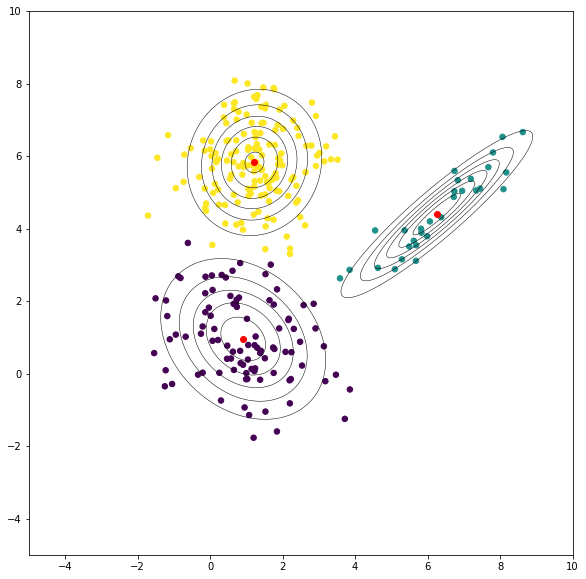

In [13]:
G.plot_clusters()